## **Airbnb EDA (Exploratory Data Analysis) Capstone Project**
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world.These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as :

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and  what could be the reason for it?

## Coding And Analysis Part

In [2]:
# Importing Basic Package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading The file 
df=pd.read_csv("/content/drive/MyDrive/Dataset/Airbnb NYC 2019.csv")

In [7]:
# it gives Starting 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# it gives last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [9]:
# checking Shape 
df.shape

(48895, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Data Preprocessing

In [13]:
# checking The Unique values
df["host_id"].nunique()

37457

In [15]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Information provided by each column:

* id: It gives a unique number for each observation.

* name: Basic description of the provided Airbnb.

* host_id: This gives us the id of the host who owns the Airbnb.

* host_name: This gives us the name of the host who owns the Airbnb.

* neighbourhood_group: The 5 boroughs(a town or district which is an administrative unit) of the New York City.

* neighbourhood: Towns/Cities present in the 5 boroughs.

* latitude: Latitude of the Airbnb.

* longitude: Longitude of the Airbnb.

* room_type: Different room types available for the Airbnb booking.

     Entire Home/Apartment
     Private Room
     Shared Room
* price: Price of the Airbnb for one night.

* minimum_nights: Number of minimun nights spent by a person in the Airbnb.

* number_of_reviews: Number of reviews received by the Airbnb.

* last_review: Date of the last review given by the user.

* reviews_per_month: Mean number of reviews received by the Airbnb per month.

* calculated_host_listings_count: Count of the list of hosts.

* availability_365: Availability of the Airbnb out of 365 days.

In [17]:
# Dropping The coumns which is not required for model building
df.drop(columns=['name','host_name','latitude','longitude','last_review','calculated_host_listings_count'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   48895 non-null  int64  
 1   host_id              48895 non-null  int64  
 2   neighbourhood_group  48895 non-null  object 
 3   neighbourhood        48895 non-null  object 
 4   room_type            48895 non-null  object 
 5   price                48895 non-null  int64  
 6   minimum_nights       48895 non-null  int64  
 7   number_of_reviews    48895 non-null  int64  
 8   reviews_per_month    38843 non-null  float64
 9   availability_365     48895 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.7+ MB


In [24]:
df["reviews_per_month"].value_counts()

0.00     10052
0.02       919
1.00       893
0.05       893
0.03       804
         ...  
9.53         1
9.74         1
6.06         1
8.25         1
10.54        1
Name: reviews_per_month, Length: 938, dtype: int64

In [23]:
# Replacing The airbnb price by 0 where rewies are null
df["reviews_per_month"]=df["reviews_per_month"].fillna(0)

In [27]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df["price"].value_counts()

100      2051
150      2047
50       1534
60       1458
200      1401
75       1370
80       1272
65       1190
70       1170
120      1130
125      1057
90       1021
250      1018
55        950
45        891
85        877
40        771
175       763
99        742
110       739
95        700
130       610
300       561
140       548
180       522
160       480
35        480
115       468
225       451
199       415
135       415
350       381
69        372
89        365
49        345
105       325
145       323
165       315
79        299
59        297
170       295
195       293
190       292
149       278
30        255
220       254
275       244
185       236
400       225
129       207
48        203
39        196
42        192
119       191
500       191
155       183
139       170
38        167
159       164
47        163
299       161
68        160
58        157
450       156
109       152
179       143
62        140
98        137
210       133
249       133
37        132
52    

In [28]:
# Some where price Of Airbnb is 0 wo we convert into median
df['price'] = df['price'].replace(0,np.median(df['price']))

In [29]:
df["price"].value_counts()

100      2051
150      2047
50       1534
60       1458
200      1401
75       1370
80       1272
65       1190
70       1170
120      1130
125      1057
90       1021
250      1018
55        950
45        891
85        877
40        771
175       763
99        742
110       739
95        700
130       610
300       561
140       548
180       522
35        480
160       480
115       468
225       451
199       415
135       415
350       381
69        372
89        365
49        345
105       325
145       323
165       315
79        299
59        297
170       295
195       293
190       292
149       278
30        255
220       254
275       244
185       236
400       225
129       207
48        203
39        196
42        192
500       191
119       191
155       183
139       170
38        167
159       164
47        163
299       161
68        160
58        157
450       156
109       152
179       143
62        140
98        137
210       133
249       133
37        132
52    

In [57]:
# Statitical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.0,9471945.00,19677284.00,2.915218e+07,36487245.0
host_id,48895.0,6.762001e+07,7.861097e+07,2438.0,7822033.00,30793816.00,1.074344e+08,274321313.0
neighbourhood_group,48895.0,1.740382e+00,8.058618e-01,1.0,1.00,2.00,2.000000e+00,5.0
room_type,48895.0,1.504060e+00,5.453790e-01,1.0,1.00,1.00,2.000000e+00,3.0
price,48895.0,1.527445e+02,2.401443e+02,10.0,69.00,106.00,1.750000e+02,10000.0
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.0,1.00,3.00,5.000000e+00,1250.0
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.0,1.00,5.00,2.400000e+01,629.0
reviews_per_month,48895.0,1.090910e+00,1.597283e+00,0.0,0.04,0.37,1.580000e+00,58.5
availability_365,48895.0,1.127813e+02,1.316223e+02,0.0,0.00,45.00,2.270000e+02,365.0


In [58]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

In [60]:
num_var=df.select_dtypes(include=[np.number])
cat_var=df.select_dtypes(include=[np.object])

<ipython-input-60-370162309a5e>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_var=df.select_dtypes(include=[np.object])


Categorical variable

In [61]:
cat_var.columns

Index(['neighbourhood'], dtype='object')

Numerical Variable

In [62]:
num_var.columns

Index(['id', 'host_id', 'neighbourhood_group', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')

### Univariate analysis

Top 10 host_ids that owns maximum number of airbnbs in the newyork city

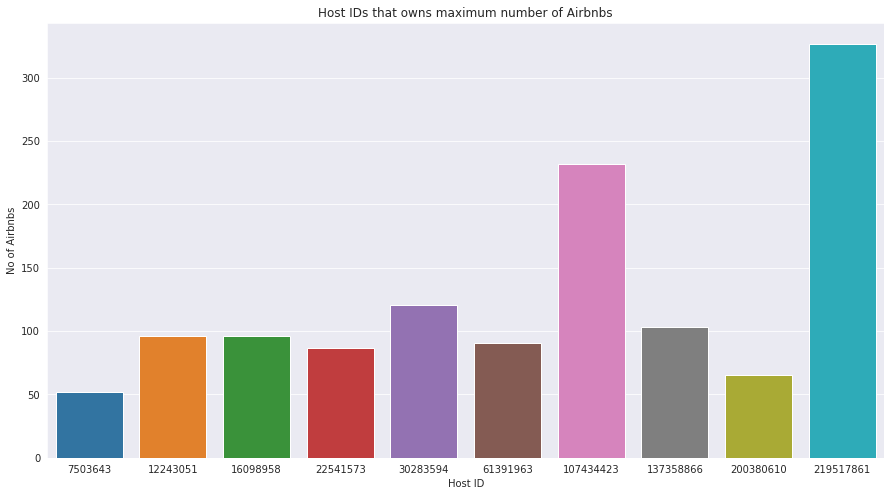

In [63]:
# Creating a dataframe representing the top 10 host IDs who own maximum number of Airbnbs
top_10_host_id = pd.DataFrame({'Host ID':df['host_id'].value_counts(ascending=False).index,
                               'No of Airbnbs':df['host_id'].value_counts(ascending=False).values})[:10]

# Defining the size of the plot
fig,ax=plt.subplots(figsize=(15,8))

# Plotting a bar graph
figure = sns.barplot(x='Host ID', y='No of Airbnbs', data = top_10_host_id)

# Defining the title of the graph
figure.set(title='Host IDs that owns maximum number of Airbnbs')

# Displaying the graph
plt.show(figure)

## **Distribution of the Airbnbs in the neighbourhood groups**

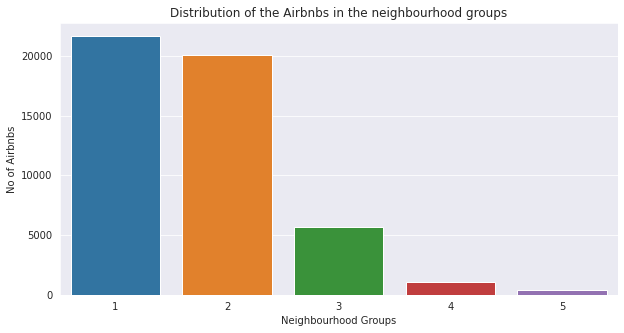



Percentage distribution of Airbnbs in the neighbourhood groups:


1    44.301053
2    41.116679
3    11.588097
4     2.231312
5     0.762859
Name: neighbourhood_group, dtype: float64

In [64]:
# Creating a dataframe representing the distribution of Airbnbs in the neighbourhood groups
airbnb_count = pd.DataFrame({'Neighbourhood Groups':df['neighbourhood_group'].value_counts(ascending=False).index,
                             'No of Airbnbs':df['neighbourhood_group'].value_counts(ascending=False).values})

# Defining the size of the plot
plt.figure(figsize=(10,5))

# Plotting a bar graph
figure = sns.barplot(x='Neighbourhood Groups', y='No of Airbnbs', data = airbnb_count)

# Defining the title of the graph
figure.set(title='Distribution of the Airbnbs in the neighbourhood groups')

# Displaying the graph
plt.show(figure)

# Percentage distribution of the Airbnbs in the neighbourhood groups  
print('\n\nPercentage distribution of Airbnbs in the neighbourhood groups:')
df['neighbourhood_group'].value_counts(normalize=True)*100

## **Distribution of Airbnbs on the basis of room types**

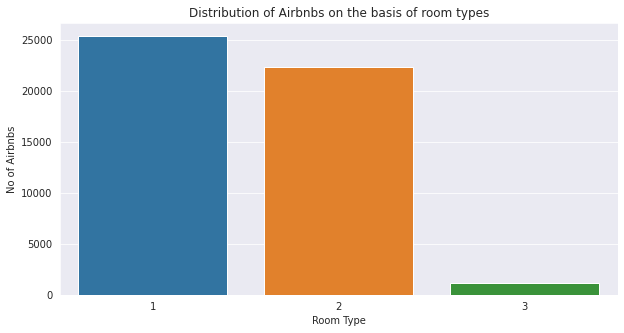



Percentage distribution of Airbnbs on the basis of room types:


1    51.966459
2    45.661111
3     2.372431
Name: room_type, dtype: float64

In [65]:
# Creating a dataframe representing the distribution of Airbnbs on the basis of room types
room_type_count = pd.DataFrame({'Room Type':df['room_type'].value_counts(ascending=False).index,
                                'No of Airbnbs':df['room_type'].value_counts(ascending=False).values})

# Defining the size of the plot
plt.figure(figsize=(10,5))

# Plotting a bar graph
figure = sns.barplot(x='Room Type', y='No of Airbnbs', data=room_type_count)

# Defining the title of the graph
figure.set(title='Distribution of Airbnbs on the basis of room types')

# Displaying the graph
plt.show(figure)

# Percentage distribution of the Airbnbs in the neighbourhood groups  
print('\n\nPercentage distribution of Airbnbs on the basis of room types:')
df['room_type'].value_counts(normalize=True)*100

## **Price distribution of the Airbnbs across the New York City**

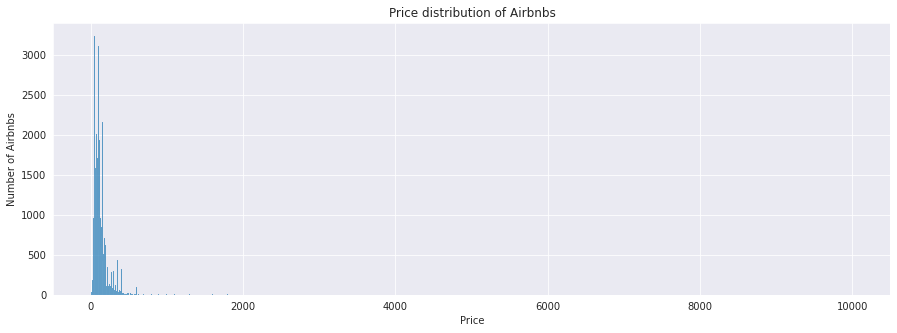

In [66]:
# Defining the size of the graph
plt.figure(figsize=(15,5))

# Defining the labels of the graph
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")

# Plotting histogram of the price distribution
figure = sns.histplot(x='price', data=df)

# Defining the title of the graph
figure.set(title='Price distribution of Airbnbs')

# Displaying the graph
plt.show(figure)

In [67]:
df['price'].describe()

count    48895.000000
mean       152.744534
std        240.144266
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

* 75% of airbnbs has price below 200

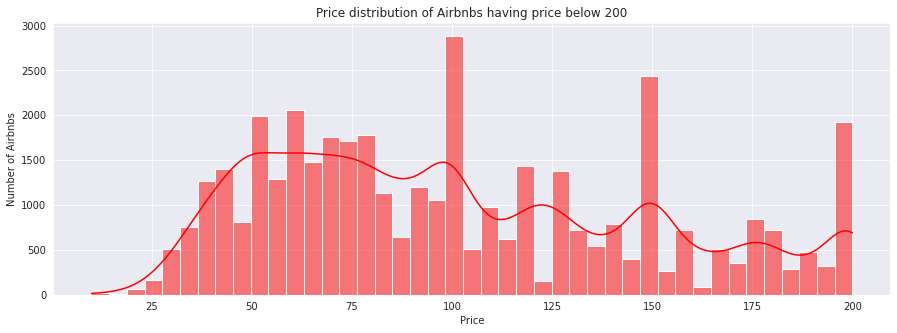

In [68]:
# Creating a dataset where Airbnb price is equal to and below 200
price_below_200 = df[df['price']<=200]

# Defining the size of the graph
plt.figure(figsize=(15,5))

# Defining the labels of the graph
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")

# Plotting histogram of the price distribution
figure_1 = sns.histplot(x='price', data=price_below_200, kde=True, color='red')

# Defining the title of the graph
figure_1.set(title='Price distribution of Airbnbs having price below 200')

# Displaying the graph
plt.show(figure_1)

## **Top 20 neighbourhoods having maximum number of Airbnbs**

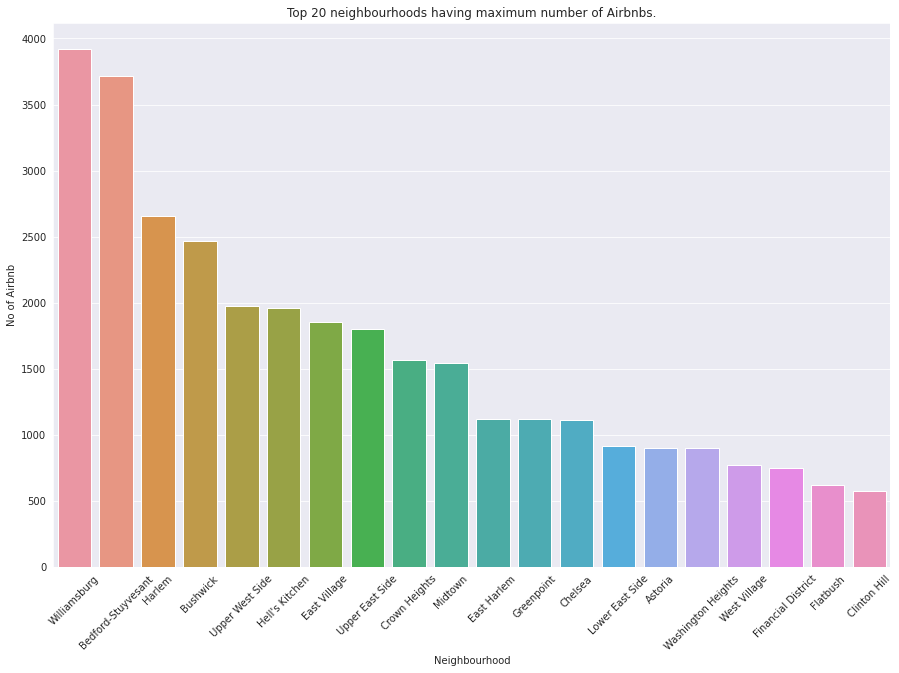

In [69]:
# Creating a dataframe representing the top 20 neighbourhoods having maximum number of Airbnbs
cities = pd.DataFrame({'Neighbourhood':df['neighbourhood'].value_counts().index,
                       'No of Airbnb':df['neighbourhood'].value_counts().values})[:20]

# Defining the size of the plot
fig,ax=plt.subplots(figsize=(15,10))

# Defining the label and title of the graph
ax.set_xticklabels(labels=cities['Neighbourhood'],rotation=45)
ax.set_title('Top 20 neighbourhoods having maximum number of Airbnbs.')

# Plotting a bar graph
figure = sns.barplot(x='Neighbourhood',y='No of Airbnb',data=cities)
plt.show(figure)

Multivariate analysis
  In which we do analysis more than 2 variables


## **Price distribution of Airbnbs on the basis of neighbourhood groups**

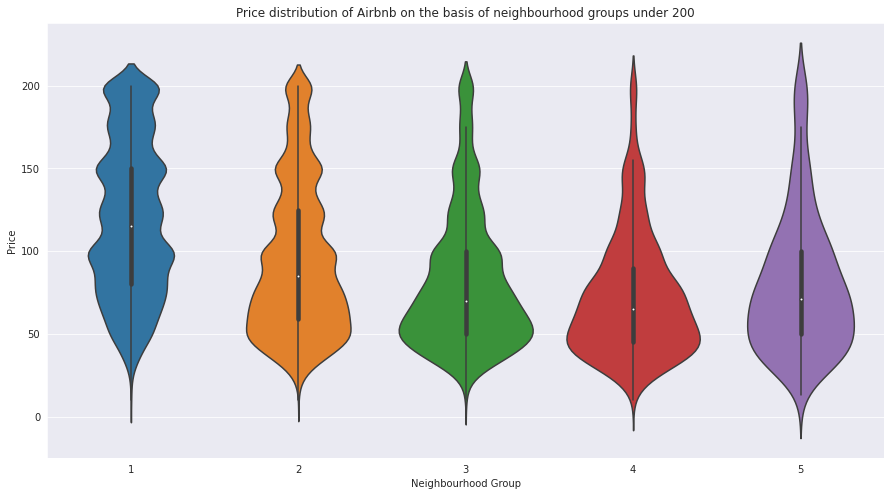

In [72]:
# Defining the size of the graph
plt.figure(figsize=(15,8))

# Plotting a violin graph 
figure = sns.violinplot(x='neighbourhood_group', y='price', data = price_below_200)

# Defining the title of the graph
figure.set(title='Price distribution of Airbnb on the basis of neighbourhood groups under 200')

# Defining the labels of the graph
figure.set_xlabel("Neighbourhood Group")
figure.set_ylabel("Price")

# Displaying the graph
plt.show(figure)

## **Airbnb prices on the basis of neighbourhood group and room type**

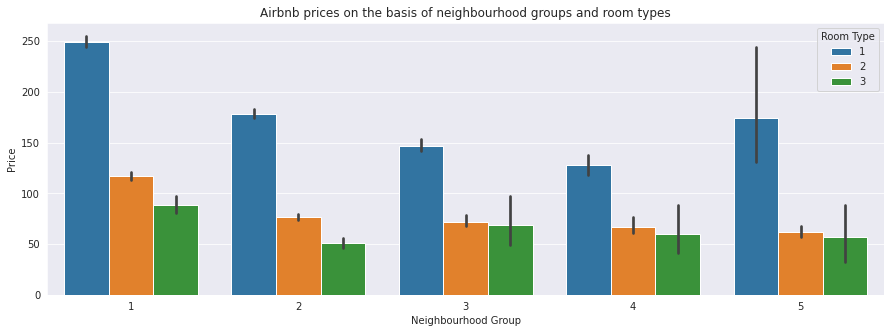

In [71]:
# Defining the size of the graph
plt.figure(figsize=(15,5))

# Plotting a bar graph
figure = sns.barplot(x='neighbourhood_group', y='price', data=df, hue='room_type')

# Defining the title of the graph
figure.set(title='Airbnb prices on the basis of neighbourhood groups and room types')

# Defining the legend title
plt.legend(title="Room Type")

# Defining the labels of the graph
figure.set_xlabel("Neighbourhood Group")
figure.set_ylabel("Price")

# Displaying the graph
plt.show(figure)

## **Average availability of Airbnbs on the basis of neighbourhood groups and room types**

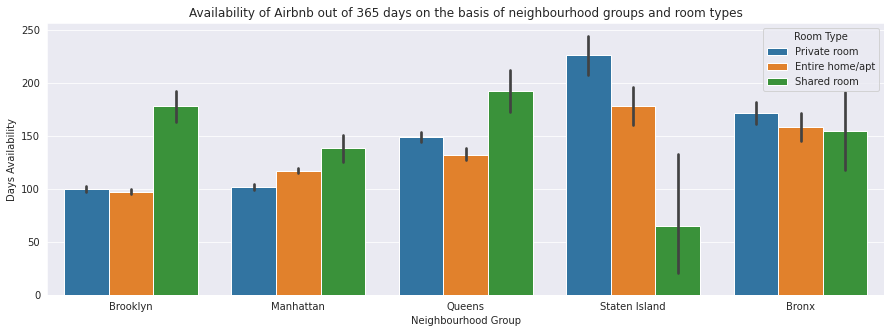

In [53]:
# Defining the size of the graph
plt.figure(figsize=(15,5))

# Plotting a bar graph
figure = sns.barplot(x='neighbourhood_group', y='availability_365', data=df, hue='room_type')

# Defining the title of the graph
figure.set(title='Availability of Airbnb out of 365 days on the basis of neighbourhood groups and room types')

# Defining the legend title
plt.legend(title="Room Type")

# Defining the labels of the graph
figure.set_xlabel("Neighbourhood Group")
figure.set_ylabel("Days Availability")

# Displaying the graph
plt.show(figure)

## **Top 20 neighbourhoods on the basis of mean price**

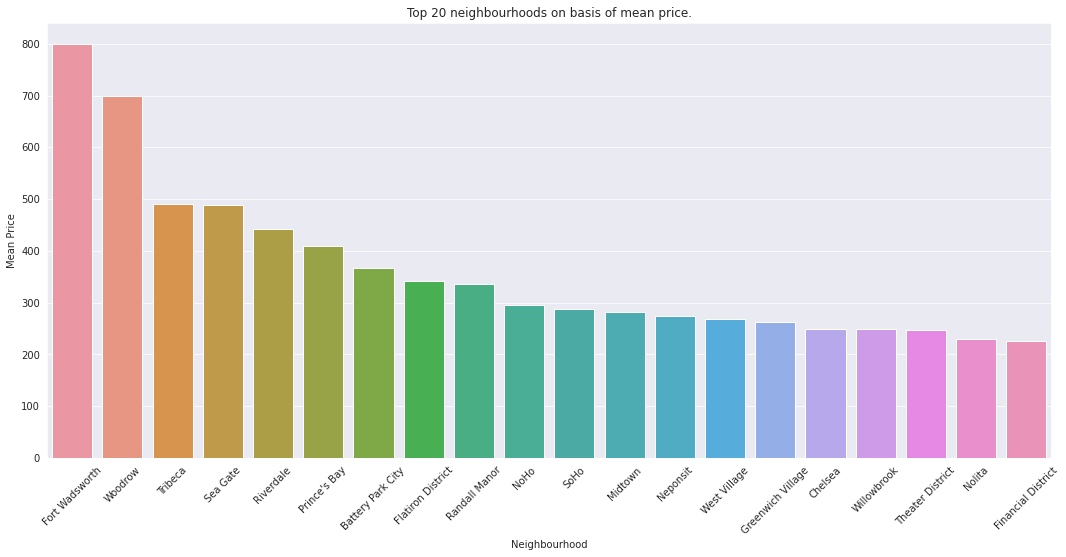

In [54]:
# Creating a dataframe representing the neighbourhoods who received maximum number of reviews 
neighbourhood_mean_price = pd.DataFrame({'Neighbourhood':df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:20].index,
                                         'Mean Price':df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:20].values})
# Defining the size of the plot
fig,ax=plt.subplots(figsize=(18,8))

# Defining the label and title of the graph
ax.set_xticklabels(labels=neighbourhood_mean_price['Neighbourhood'],rotation=45)
ax.set_title('Top 20 neighbourhoods on basis of mean price.')

# Plotting a bar graph
figure = sns.barplot(x='Neighbourhood',y='Mean Price',data=neighbourhood_mean_price)
plt.show(figure)

## **Distribution of number of reviews received by the Airbnbs on the basis of price and room type**

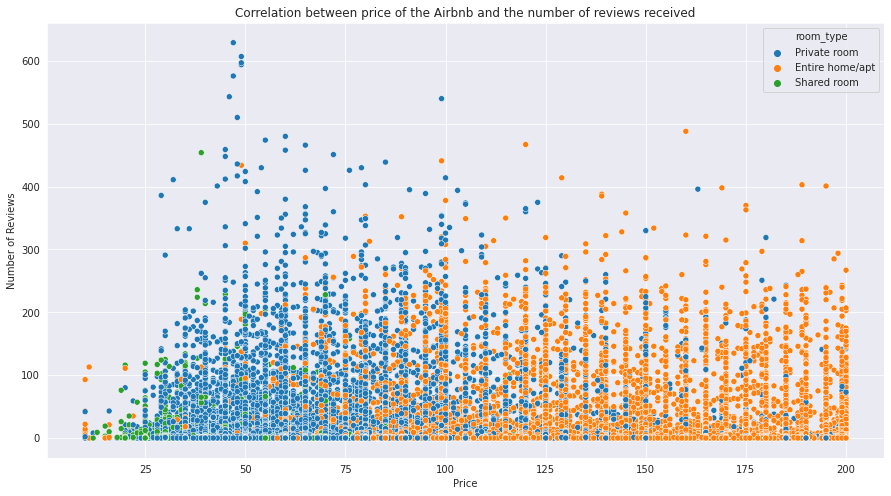

In [55]:
# Defining the size of the chart
plt.figure(figsize=(15,8))

# Defining the labels of the graph
plt.xlabel("Price")
plt.ylabel("Number of Reviews")

# Plotting a scatterplot
figure = sns.scatterplot(x='price', y='number_of_reviews', hue='room_type',data = price_below_200,color='red')

# Defining the title of the graph
figure.set(title='Correlation between price of the Airbnb and the number of reviews received')

# Displaying the graph
plt.show(figure)


## **Correlation between all the variables**

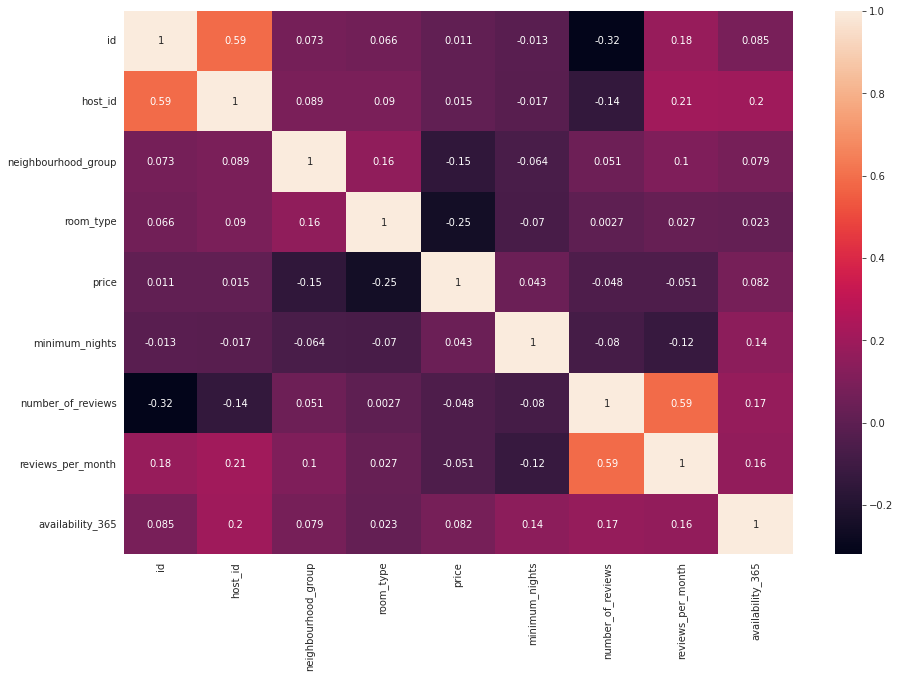

In [56]:
# Assigning numerical values to the categorical data
df['room_type'] = df['room_type'].replace({'Entire home/apt':1, 'Private room':2, 'Shared room':3})
df['neighbourhood_group'] = df['neighbourhood_group'].replace({'Manhattan':1, 'Brooklyn':2, 'Queens':3, 'Bronx':4, 'Staten Island':5})

# Defining the size of the graph
plt.figure(figsize=(15,10))

#Plotting a heatmap
figure = sns.heatmap(df.corr(),annot=True)
plt.show(figure)